Epoch 1/50
469/469 [==============================] - 86s 179ms/step - loss: 0.2203 - val_loss: 0.1446
Epoch 2/50
469/469 [==============================] - 85s 180ms/step - loss: 0.1347 - val_loss: 0.1255
Epoch 3/50
469/469 [==============================] - 85s 181ms/step - loss: 0.1219 - val_loss: 0.1167
Epoch 4/50
469/469 [==============================] - 85s 182ms/step - loss: 0.1154 - val_loss: 0.1120
Epoch 5/50
469/469 [==============================] - 88s 188ms/step - loss: 0.1117 - val_loss: 0.1093
Epoch 6/50
469/469 [==============================] - 85s 181ms/step - loss: 0.1091 - val_loss: 0.1071
Epoch 7/50
469/469 [==============================] - 85s 182ms/step - loss: 0.1071 - val_loss: 0.1058
Epoch 8/50
469/469 [==============================] - 83s 177ms/step - loss: 0.1055 - val_loss: 0.1037
Epoch 9/50
469/469 [==============================] - 84s 179ms/step - loss: 0.1042 - val_loss: 0.1024
Epoch 10/50
469/469 [==============================] - 87s 186ms/step - l

Test loss: 0.08931010961532593
313/313 [==============================] - 4s 13ms/step


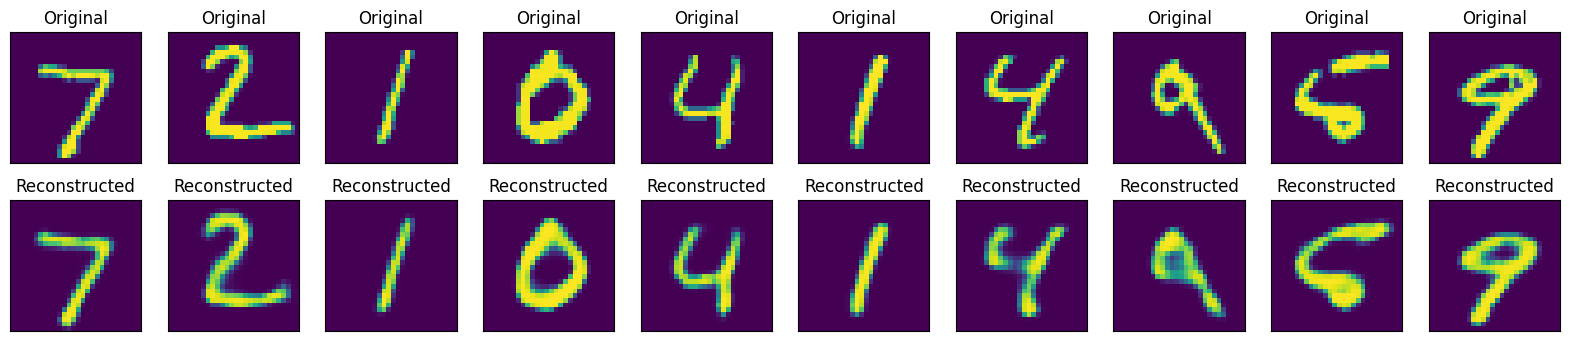

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


# Define the autoencoder model
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

# Compile and train the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test))
autoencoder.save()

# Evaluate the model on the test set
score = autoencoder.evaluate(x_test, x_test, verbose=0)
print('Test loss:', score)

# Visualize some reconstructed samples
decoded_imgs = autoencoder.predict(x_test)



In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image

pb_model_dir = "/content/autoencoder"
h5_model = "./AUTOENCODER.h5"

# Loading the Tensorflow Saved Model (PB)
model = tf.keras.models.load_model(pb_model_dir)
print(model.summary())

# Saving the Model in H5 Format
tf.keras.models.save_model(model, h5_model)

# Loading the H5 Saved Model
loaded_model_from_h5 = tf.keras.models.load_model(h5_model)
print(loaded_model_from_h5.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 7, 7, 8)           584 

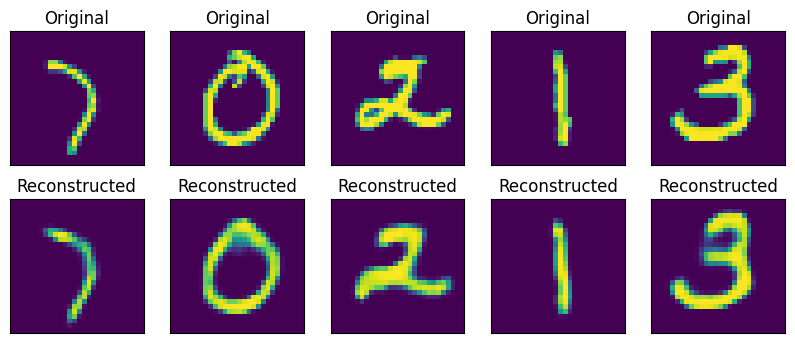

In [ ]:
n = 5
from keras.models import load_model
from numpy.random import randint
autoencoder= load_model('AUTOENCODER.h5', compile=False)
plt.figure(figsize=(10, 4))


for i in range(n):
    ix = randint(0, 10000,1)
    # Original image
    ori_img = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[ix].reshape(28, 28))
    plt.title("Original")
    ori_img.get_xaxis().set_visible(False)
    ori_img.get_yaxis().set_visible(False)
    
    # Reconstructed image
    re_img = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[ix].reshape(28, 28))
    plt.title("Reconstructed")
    re_img.get_xaxis().set_visible(False)
    re_img.get_yaxis().set_visible(False)
plt.show()
